<a href="https://colab.research.google.com/github/adeiltonmsantos/DIO_Confusion_Matrix/blob/main/Confusion_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Desafio - Matriz de Confusão (DIO - Machine Learning Practicioner)**

Este notebook Colab foi editado a partir de https://colab.research.google.com/drive/1S9ThhinDflxU4KmTdxcv6_mE_vWwk2Jk

Foram adicionados novos códigos e parte do código original foi modificado para realizar o cálculo das métricas acurácia, sensibilidade, especificidade, precisão e F-score

In [1]:
!pip install -q tensorflow

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models, Input
import io
import numpy as np
import seaborn as sns
import pandas as pd

In [3]:
tf.__version__

'2.17.1'

In [4]:
%load_ext tensorboard

In [5]:
logdir='log'

In [6]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
input_layer = Input(shape=(28, 28, 1)) # Definindo a camada de entrada

model = models.Sequential()
model.add(input_layer) # Adicionando a camada de entrada ao modelo
model.add(layers.Conv2D(32, (3, 3), activation='relu')) # Removendo input_shape daqui
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [8]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images,
            y=train_labels,
            epochs=5,
            validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 88s 44ms/step - accuracy: 0.8987 - loss: 0.3336 - val_accuracy: 0.9885 - val_loss: 0.0379
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9862 - loss: 0.0450 - val_accuracy: 0.9889 - val_loss: 0.0347
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 33ms/step - accuracy: 0.9901 - loss: 0.0308 - val_accuracy: 0.9880 - val_loss: 0.0359
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9928 - loss: 0.0225 - val_accuracy: 0.9909 - val_loss: 0.0310
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 34ms/step - accuracy: 0.9942 - loss: 0.0179 - val_accuracy: 0.9924 - val_loss: 0.0286


In [10]:
y_true = test_labels
y_pred = np.argmax(model.predict(test_images), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [11]:
classes=[0,1,2,3,4,5,6,7,8,9]

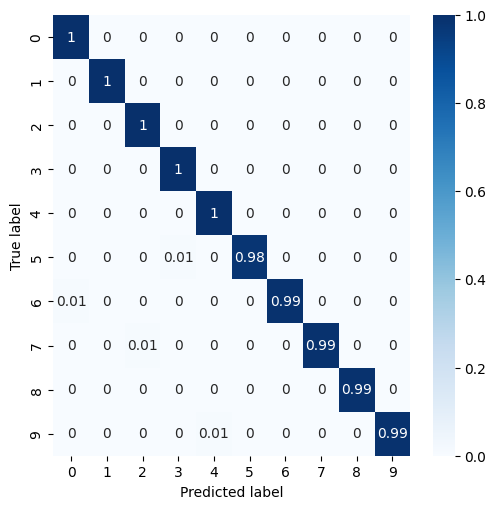

In [12]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)

figure = plt.figure(figsize=(5, 5))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [13]:
input_layer = Input(shape=(28, 28, 1))

model1 = models.Sequential()
model1.add(input_layer)

model1.add(layers.Conv2D(32, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))

model1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:
file_writer = tf.summary.create_file_writer(logdir + '/cm')

def log_confusion_matrix(epoch, logs):
  # Use the model to predict the values from the validation dataset.
  # test_pred = model1.predict_classes(test_images)
  test_pred_raw = model1.predict(test_images)  # Get raw predictions
  test_pred = np.argmax(test_pred_raw, axis=-1)  # Get predicted class labels

  con_mat = tf.math.confusion_matrix(labels=test_labels, predictions=test_pred).numpy()
  con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

  con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)

  figure = plt.figure(figsize=(8, 8))
  sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

  buf = io.BytesIO()
  plt.savefig(buf, format='png')

  plt.close(figure)
  buf.seek(0)
  image = tf.image.decode_png(buf.getvalue(), channels=4)

  image = tf.expand_dims(image, 0)

  # Log the confusion matrix as an image summary.
  with file_writer.as_default():
    tf.summary.image("Confusion Matrix", image, step=epoch)


logdir='logs/images'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

cm_callback = keras.callbacks.LambdaCallback(on_epoch_end=log_confusion_matrix)

In [15]:
model1.fit(
    train_images,
    train_labels,
    epochs=5,
    verbose=0,
    callbacks=[tensorboard_callback, cm_callback],
    validation_data=(test_images, test_labels),
)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


## **Cálculos das métricas**

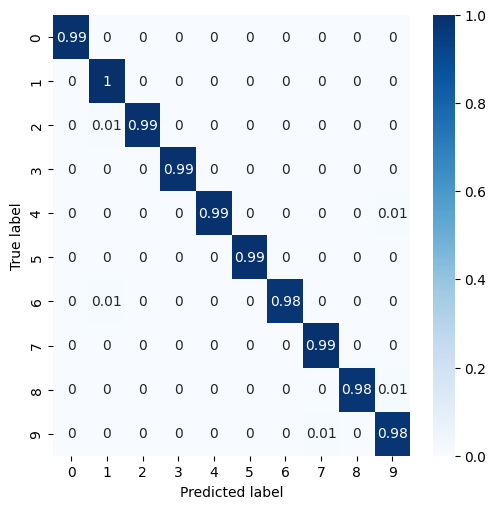


Extraindo da matriz de confusão, temos que para cada classe:

- VP: é o valor da classe na diagonal principal da matriz
- FN: é a soma dos valores da linha da classe subtraída de VP
- FP: é a soma da coluna da classe subtraída de VP
- VN: é a soma de todos os valores da matriz subtráida de VP, FN e FP


Já o cálculo das métricas:


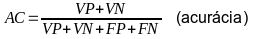

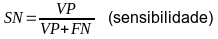

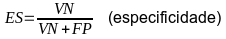

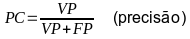

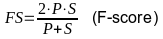

Seguem os cálculos abaixo:

In [16]:
# 'Series' criada a partir da soma de cada coluna de 'con_mat_df'. Corresponde
# a uma única coluna em que cada célula é a soma de cada coluna de 'con_mat_df',
# ou seja, VP + FP para cada classe

s = np.sum(con_mat_df)

# Dicionários para acurácia (AC), sensibilidade (SN), especificidade (ES),
# precisão (PR) e  F-score (FS) de todas as classes (0,1,2,3,4,5,6,7,8,9)
AC = {}
SN = {}
ES = {}
PR = {}
FS = {}

# Loop para definir os valores dos dicionários VP, VN, FP, FN e calcular as métricas
for i in range(len(con_mat_df)):

  # VP: Verdadeiro positivo (diagonal principal para a classe i)
  VP = con_mat_df.iloc[i,i]

  # FN: Falsos negativos (soma dos valores da classe i subtraído de VP)
  FN = sum(con_mat_df.iloc[i, :]) - VP

  # FP: Falsos positivos (soma da classe i subtráido de VP)
  FP = sum(con_mat_df.iloc[:, i]) - VP

  # VN: Verdadeiros negativos (soma da classe i subtraída de VP, FN e FP)
  VN = s[i] - VP - FN - FP

  # Acurácia para a classe i
  AC[i] = (VP + VN) / (VP + FN + FP + FN)

  # Sensibilidade para a classe i
  SN[i] = VP / (VP + FN) if VP + FN != 0 else 0.0

  # Especificidade para a classe i
  ES[i] = VN / (VN + FP) if VN + FP != 0 else 0.0

  # Precisão para a classe i
  PR[i] = VP / (VP + FP) if VP + FP != 0 else 0.0

  # F-score para a classe i
  FS[i] = (2 * PR[i] * SN[i]) / (PR[i] + SN[i])

# Lista com todos os dicionários das métricas, cada c/ uma frase para imprimir
MT =[]
MT.append(['\nValores de Acurácia', AC])
MT.append(['\nValores de Sensibilidade', SN])
MT.append(['\nValores de Especificidade', ES])
MT.append(['\nValores de Precisão', PR])
MT.append(['\nValores de F-Score', FS])

# Listando os valores de todas as métricas para todas as classes
for item in MT:
  print(item[0])
  for key, value in item[1].items():
    print(f'Classe {key}: {value:.4f}')


Valores de Acurácia
Classe 0: 0.9901
Classe 1: 1.0000
Classe 2: 0.9901
Classe 3: 0.9901
Classe 4: 0.9901
Classe 5: 0.9700
Classe 6: 0.9703
Classe 7: 0.9703
Classe 8: 1.0000
Classe 9: 0.9703

Valores de Sensibilidade
Classe 0: 1.0000
Classe 1: 1.0000
Classe 2: 1.0000
Classe 3: 1.0000
Classe 4: 1.0000
Classe 5: 0.9899
Classe 6: 0.9900
Classe 7: 0.9900
Classe 8: 1.0000
Classe 9: 0.9900

Valores de Especificidade
Classe 0: 0.0000
Classe 1: 0.0000
Classe 2: 0.0000
Classe 3: 0.0000
Classe 4: 0.0000
Classe 5: 1.0000
Classe 6: 1.0000
Classe 7: 1.0000
Classe 8: 0.0000
Classe 9: 1.0000

Valores de Precisão
Classe 0: 0.9901
Classe 1: 1.0000
Classe 2: 0.9901
Classe 3: 0.9901
Classe 4: 0.9901
Classe 5: 1.0000
Classe 6: 1.0000
Classe 7: 1.0000
Classe 8: 1.0000
Classe 9: 1.0000

Valores de F-Score
Classe 0: 0.9950
Classe 1: 1.0000
Classe 2: 0.9950
Classe 3: 0.9950
Classe 4: 0.9950
Classe 5: 0.9949
Classe 6: 0.9950
Classe 7: 0.9950
Classe 8: 1.0000
Classe 9: 0.9950


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


## **Curva de ROC**

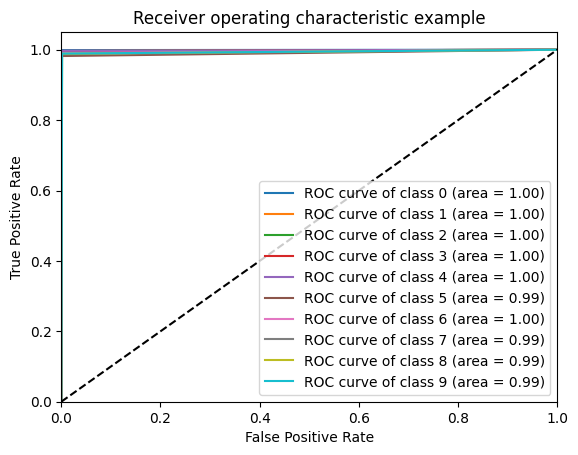

In [18]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarizando os rótulos para cálculo de multiclasses ROC
y_true_bin = label_binarize(y_true, classes=classes)
y_pred_bin = label_binarize(y_pred, classes=classes)

# Inicializando listas para armazenar TPR e FPR para cada classe
fpr = {}
tpr = {}
roc_auc = {}

# Loop através de cada classe
for i in range(len(classes)):
    # Calculando a curca de ROC e AUC para a classe atual
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotando as curvas de ROC
plt.figure()
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

# Configurando os gráficos
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()